In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf_results = pd.read_csv('tf_fool_saltandpepper.csv')

In [3]:
tf_results.head()

,trial_id,robust_acc,test_loss,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,75c8d020,0.100000,2.194781,185.388086,True,NaN,NaN,1,a6c78786292d4ce1834afce5ebccec6b,2020-10-07_06-56-33,...,lambda1,140.221.79.11,185.388086,0,1,"1_batch_size=480,dropout=0.86242,epochs=89,lea...",0.091996,0.862424,89,480
1,75c8d021,0.494774,1.319409,137.880242,True,NaN,NaN,1,93d6917038884b2a80818432b949f2b0,2020-10-07_06-55-45,...,lambda1,140.221.79.11,137.880242,0,1,"2_batch_size=574,dropout=0.74806,epochs=58,lea...",0.082690,0.748062,58,574
2,75c8d022,0.843217,0.576142,141.170249,True,NaN,NaN,1,2d2dfd885bcf4b5497554928a9f5ffa4,2020-10-07_06-55-49,...,lambda1,140.221.79.11,141.170249,0,1,"3_batch_size=943,dropout=0.70294,epochs=69,lea...",0.065899,0.702941,69,943
3,75c8d023,0.837526,0.535381,180.085378,True,NaN,NaN,1,9dcba5cccff14a769c455a2cea3bc8ee,2020-10-07_06-56-27,...,lambda1,140.221.79.11,180.085378,0,1,"4_batch_size=633,dropout=0.50343,epochs=77,lea...",0.073180,0.503429,77,633
4,75c8d024,0.789499,0.824967,183.857753,True,NaN,NaN,1,334019abb50241f190bdb577dbb8d7d9,2020-10-07_06-56-31,...,lambda1,140.221.79.11,183.857753,0,1,"5_batch_size=482,dropout=0.46562,epochs=77,lea...",0.078481,0.465621,77,482


In [4]:
pt_results = pd.read_csv('pt_fool_saltandpepper.csv')

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [6]:
tf_results['pca'] = pca.fit_transform(tf_results[['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']])

In [7]:
pca = PCA(n_components=1)

In [8]:
pt_results['pca'] = pca.fit_transform(pt_results[['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']])

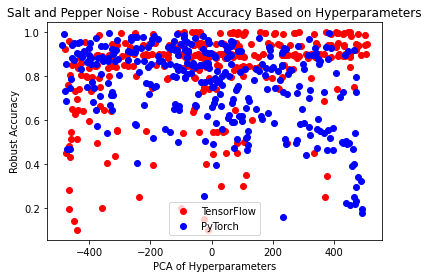

In [10]:
ax = plt.gca()
ax.scatter(tf_results['pca'], tf_results['robust_acc'], color="red", label="TensorFlow")
ax.scatter(pt_results['pca'], pt_results['robust_acc'], color="blue", label="PyTorch")
ax.set_title("Salt and Pepper Noise - Robust Accuracy Based on Hyperparameters")
ax.set_xlabel("PCA of Hyperparameters")
ax.set_ylabel("Robust Accuracy")
ax.legend()
plt.show()